In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

In [3]:
mydata=pd.read_csv('D://mydata.csv')

In [4]:
mydata

,columns1,columns2,columns3
0,1,a,A
1,2,a,A
2,2,a,A
3,3,b,B
4,4,b,B
5,4,b,B


In [5]:
mydata.duplicated()

0    False
1    False
2     True
3    False
4    False
5     True
dtype: bool

In [6]:
mydata.drop_duplicates()

,columns1,columns2,columns3
0,1,a,A
1,2,a,A
3,3,b,B
4,4,b,B


In [7]:
mydata.drop_duplicates(['columns2'])

,columns1,columns2,columns3
0,1,a,A
3,3,b,B


In [8]:
my_source1=pd.read_csv('D://my_source1.csv')

In [9]:
my_source2=pd.read_csv('D://my_source2.csv')

In [10]:
my_source1

,0,1,2,3,4
0,babak,1,13,17,17
1,raha,2,14,14,15
2,sara,3,17,12,20
3,reza,4,12,18,19


In [11]:
my_source2

,0,1,2,3
0,babak,1,13,17
1,baran,2,15,20
2,sara,3,14,19
3,arash,4,20,19
4,mehran,5,15,18
5,reza,6,14,12


In [28]:
my_concat=pd.concat([my_source1,my_source2],axis=0,ignore_index=True)

In [30]:
my_concat

,0,1,2,3,4
0,babak,1,13,17,17.0
1,raha,2,14,14,15.0
2,sara,3,17,12,20.0
3,reza,4,12,18,19.0
4,babak,1,13,17,NaN
5,baran,2,15,20,NaN
6,sara,3,14,19,NaN
7,arash,4,20,19,NaN
8,mehran,5,15,18,NaN
9,reza,6,14,12,NaN


In [31]:
my_concat.drop(['4'],axis=1,inplace=True)

In [32]:
my_concat

,0,1,2,3
0,babak,1,13,17
1,raha,2,14,14
2,sara,3,17,12
3,reza,4,12,18
4,babak,1,13,17
5,baran,2,15,20
6,sara,3,14,19
7,arash,4,20,19
8,mehran,5,15,18
9,reza,6,14,12


In [33]:
my_concat.drop_duplicates(inplace=True)

In [34]:
my_concat

,0,1,2,3
0,babak,1,13,17
1,raha,2,14,14
2,sara,3,17,12
3,reza,4,12,18
5,baran,2,15,20
6,sara,3,14,19
7,arash,4,20,19
8,mehran,5,15,18
9,reza,6,14,12


In [35]:
smartphones=pd.read_csv('D://smartphones.csv')

In [36]:
smartphones

,Name,OS,Capacity,Ram,Weight,Company,inch
0,Galaxy S8,Android,64,4,149.0,Samsung,5.8
1,Lumia 950,windows,32,3,150.0,Microsoft,5.2
2,Xpreia L1,Android,16,2,180.0,Sony,5.5
3,iphone 7,ios,128,2,138.0,Apple,4.7
4,U Ultra,Android,64,4,170.0,HTC,5.7
5,Galaxy S5,Android,16,2,145.0,Samsung,5.1
6,iphone 5s,ios,32,1,112.0,Apple,4.0
7,Moto G5,Android,16,3,144.5,Motorola,5.0
8,Pixel,Android,128,4,143.0,Google,5.0


In [38]:
smartphones.describe()

,Capacity,Ram,Weight,inch
count,9.000000,9.000000,9.000000,9.000000
mean,55.111111,2.777778,147.944444,5.111111
std,45.333333,1.092906,19.219854,0.548736
min,16.000000,1.000000,112.000000,4.000000
25%,16.000000,2.000000,143.000000,5.000000
50%,32.000000,3.000000,145.000000,5.100000
75%,64.000000,4.000000,150.000000,5.500000
max,128.000000,4.000000,180.000000,5.800000


In [40]:
smartphones.OS.value_counts()

Android    6
ios        2
windows    1
Name: OS, dtype: int64

In [41]:
smartphones.Company.value_counts()

Samsung      2
Apple        2
Motorola     1
Sony         1
Google       1
Microsoft    1
HTC          1
Name: Company, dtype: int64

In [42]:
smartphones.Capacity.value_counts()

16     3
32     2
128    2
64     2
Name: Capacity, dtype: int64

In [46]:
cat_os=smartphones.groupby(smartphones['Company'])

In [44]:
cat_os

In [47]:
cat_os.mean()

,Capacity,Ram,Weight,inch
Company,,,,
Apple,80.0,1.5,125.0,4.35
Google,128.0,4.0,143.0,5.00
HTC,64.0,4.0,170.0,5.70
Microsoft,32.0,3.0,150.0,5.20
Motorola,16.0,3.0,144.5,5.00
Samsung,40.0,3.0,147.0,5.45
Sony,16.0,2.0,180.0,5.50


In [48]:
pd.crosstab(smartphones.OS,smartphones.Capacity)

Capacity,16,32,64,128
OS,,,,
Android,3,0,2,1
ios,0,1,0,1
windows,0,1,0,0


In [49]:
smartphones

,Name,OS,Capacity,Ram,Weight,Company,inch
0,Galaxy S8,Android,64,4,149.0,Samsung,5.8
1,Lumia 950,windows,32,3,150.0,Microsoft,5.2
2,Xpreia L1,Android,16,2,180.0,Sony,5.5
3,iphone 7,ios,128,2,138.0,Apple,4.7
4,U Ultra,Android,64,4,170.0,HTC,5.7
5,Galaxy S5,Android,16,2,145.0,Samsung,5.1
6,iphone 5s,ios,32,1,112.0,Apple,4.0
7,Moto G5,Android,16,3,144.5,Motorola,5.0
8,Pixel,Android,128,4,143.0,Google,5.0


In [50]:
pd.pivot_table(smartphones,index='Name',columns='Company',values='Ram')

Company,Apple,Google,HTC,Microsoft,Motorola,Samsung,Sony
Name,,,,,,,
Galaxy S5,NaN,NaN,NaN,NaN,NaN,2.0,NaN
Galaxy S8,NaN,NaN,NaN,NaN,NaN,4.0,NaN
Lumia 950,NaN,NaN,NaN,3.0,NaN,NaN,NaN
Moto G5,NaN,NaN,NaN,NaN,3.0,NaN,NaN
Pixel,NaN,4.0,NaN,NaN,NaN,NaN,NaN
U Ultra,NaN,NaN,4.0,NaN,NaN,NaN,NaN
Xpreia L1,NaN,NaN,NaN,NaN,NaN,NaN,2.0
iphone 5s,1.0,NaN,NaN,NaN,NaN,NaN,NaN
iphone 7,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
smartphones.rename(index=smartphones.Name,inplace=True)

In [52]:
smartphones

,Name,OS,Capacity,Ram,Weight,Company,inch
Galaxy S8,Galaxy S8,Android,64,4,149.0,Samsung,5.8
Lumia 950,Lumia 950,windows,32,3,150.0,Microsoft,5.2
Xpreia L1,Xpreia L1,Android,16,2,180.0,Sony,5.5
iphone 7,iphone 7,ios,128,2,138.0,Apple,4.7
U Ultra,U Ultra,Android,64,4,170.0,HTC,5.7
Galaxy S5,Galaxy S5,Android,16,2,145.0,Samsung,5.1
iphone 5s,iphone 5s,ios,32,1,112.0,Apple,4.0
Moto G5,Moto G5,Android,16,3,144.5,Motorola,5.0
Pixel,Pixel,Android,128,4,143.0,Google,5.0


In [54]:
smartphones.drop(['Name','Company'],axis=1,inplace=True)

In [55]:
smartphones

,OS,Capacity,Ram,Weight,inch
Galaxy S8,Android,64,4,149.0,5.8
Lumia 950,windows,32,3,150.0,5.2
Xpreia L1,Android,16,2,180.0,5.5
iphone 7,ios,128,2,138.0,4.7
U Ultra,Android,64,4,170.0,5.7
Galaxy S5,Android,16,2,145.0,5.1
iphone 5s,ios,32,1,112.0,4.0
Moto G5,Android,16,3,144.5,5.0
Pixel,Android,128,4,143.0,5.0


In [56]:
smartphones_data=pd.get_dummies(smartphones)

In [57]:
smartphones_data

,Capacity,Ram,Weight,inch,OS_Android,OS_ios,OS_windows
Galaxy S8,64,4,149.0,5.8,1,0,0
Lumia 950,32,3,150.0,5.2,0,0,1
Xpreia L1,16,2,180.0,5.5,1,0,0
iphone 7,128,2,138.0,4.7,0,1,0
U Ultra,64,4,170.0,5.7,1,0,0
Galaxy S5,16,2,145.0,5.1,1,0,0
iphone 5s,32,1,112.0,4.0,0,1,0
Moto G5,16,3,144.5,5.0,1,0,0
Pixel,128,4,143.0,5.0,1,0,0


In [58]:
smartphones_data.drop(['OS_windows'],axis=1,inplace=True)

In [60]:
smartphones_data

,Capacity,Ram,Weight,inch,OS_Android,OS_ios
Galaxy S8,64,4,149.0,5.8,1,0
Lumia 950,32,3,150.0,5.2,0,0
Xpreia L1,16,2,180.0,5.5,1,0
iphone 7,128,2,138.0,4.7,0,1
U Ultra,64,4,170.0,5.7,1,0
Galaxy S5,16,2,145.0,5.1,1,0
iphone 5s,32,1,112.0,4.0,0,1
Moto G5,16,3,144.5,5.0,1,0
Pixel,128,4,143.0,5.0,1,0


In [61]:
smartphones_data.describe()

,Capacity,Ram,Weight,inch,OS_Android,OS_ios
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,55.111111,2.777778,147.944444,5.111111,0.666667,0.222222
std,45.333333,1.092906,19.219854,0.548736,0.500000,0.440959
min,16.000000,1.000000,112.000000,4.000000,0.000000,0.000000
25%,16.000000,2.000000,143.000000,5.000000,0.000000,0.000000
50%,32.000000,3.000000,145.000000,5.100000,1.000000,0.000000
75%,64.000000,4.000000,150.000000,5.500000,1.000000,0.000000
max,128.000000,4.000000,180.000000,5.800000,1.000000,1.000000


In [76]:
from sklearn.preprocessing import scale , normalize, minmax_scale

In [64]:
scale_data=scale(smartphones_data)

In [65]:
scale_data

array([[ 0.20797258,  1.18616051,  0.05825152,  1.33156402,  0.70710678,
        -0.53452248],
       [-0.54072872,  0.21566555,  0.11343717,  0.17181471, -1.41421356,
        -0.53452248],
       [-0.91507936, -0.75482941,  1.76900675,  0.75168936,  0.70710678,
        -0.53452248],
       [ 1.70537518, -0.75482941, -0.54879066, -0.79464304, -1.41421356,
         1.87082869],
       [ 0.20797258,  1.18616051,  1.21715023,  1.13827247,  0.70710678,
        -0.53452248],
       [-0.91507936, -0.75482941, -0.16249109, -0.02147684,  0.70710678,
        -0.53452248],
       [-0.54072872, -1.72532437, -1.98361762, -2.1476839 , -1.41421356,
         1.87082869],
       [-0.91507936,  0.21566555, -0.19008391, -0.21476839,  0.70710678,
        -0.53452248],
       [ 1.70537518,  1.18616051, -0.27286239, -0.21476839,  0.70710678,
        -0.53452248]])

In [66]:
df_smartphones=pd.DataFrame(scale_data,index=smartphones_data.index,columns=smartphones_data.columns)

In [67]:
df_smartphones

,Capacity,Ram,Weight,inch,OS_Android,OS_ios
Galaxy S8,0.207973,1.186161,0.058252,1.331564,0.707107,-0.534522
Lumia 950,-0.540729,0.215666,0.113437,0.171815,-1.414214,-0.534522
Xpreia L1,-0.915079,-0.754829,1.769007,0.751689,0.707107,-0.534522
iphone 7,1.705375,-0.754829,-0.548791,-0.794643,-1.414214,1.870829
U Ultra,0.207973,1.186161,1.217150,1.138272,0.707107,-0.534522
Galaxy S5,-0.915079,-0.754829,-0.162491,-0.021477,0.707107,-0.534522
iphone 5s,-0.540729,-1.725324,-1.983618,-2.147684,-1.414214,1.870829
Moto G5,-0.915079,0.215666,-0.190084,-0.214768,0.707107,-0.534522
Pixel,1.705375,1.186161,-0.272862,-0.214768,0.707107,-0.534522


In [74]:
norm_data=normalize(smartphones_data,norm='l1',axis=0)

In [75]:
df_smartphones=pd.DataFrame(norm_data,index=smartphones_data.index,columns=smartphones_data.columns)
df_smartphones

,Capacity,Ram,Weight,inch,OS_Android,OS_ios
Galaxy S8,0.129032,0.16,0.111904,0.126087,0.166667,0.0
Lumia 950,0.064516,0.12,0.112655,0.113043,0.000000,0.0
Xpreia L1,0.032258,0.08,0.135186,0.119565,0.166667,0.0
iphone 7,0.258065,0.08,0.103643,0.102174,0.000000,0.5
U Ultra,0.129032,0.16,0.127676,0.123913,0.166667,0.0
Galaxy S5,0.032258,0.08,0.108900,0.110870,0.166667,0.0
iphone 5s,0.064516,0.04,0.084116,0.086957,0.000000,0.5
Moto G5,0.032258,0.12,0.108524,0.108696,0.166667,0.0
Pixel,0.258065,0.16,0.107398,0.108696,0.166667,0.0


In [79]:
minmax_df=minmax_scale(smartphones_data,feature_range=(-1,1))

In [80]:
df_smartphones=pd.DataFrame(minmax_df,index=smartphones_data.index,columns=smartphones_data.columns)
df_smartphones

,Capacity,Ram,Weight,inch,OS_Android,OS_ios
Galaxy S8,-0.142857,1.000000,0.088235,1.000000,1.0,-1.0
Lumia 950,-0.714286,0.333333,0.117647,0.333333,-1.0,-1.0
Xpreia L1,-1.000000,-0.333333,1.000000,0.666667,1.0,-1.0
iphone 7,1.000000,-0.333333,-0.235294,-0.222222,-1.0,1.0
U Ultra,-0.142857,1.000000,0.705882,0.888889,1.0,-1.0
Galaxy S5,-1.000000,-0.333333,-0.029412,0.222222,1.0,-1.0
iphone 5s,-0.714286,-1.000000,-1.000000,-1.000000,-1.0,1.0
Moto G5,-1.000000,0.333333,-0.044118,0.111111,1.0,-1.0
Pixel,1.000000,1.000000,-0.088235,0.111111,1.0,-1.0


In [81]:
df=pd.DataFrame(np.array([1,2,3,4,10,27]))


In [84]:
df.quantile(0.75)

0    8.5
Name: 0.75, dtype: float64

In [85]:
import matplotlib.pyplot as plt

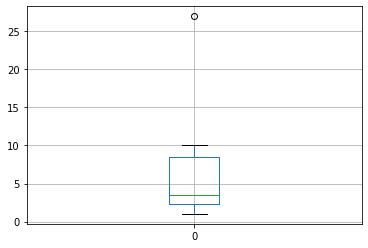

In [86]:
df.boxplot()